In [1]:
from Spectrum import from_fits, snip, average
%matplotlib inline

#### Import a fits file into a spectrum object. Spectrum.plot_i() takes any plt.plot() kargs

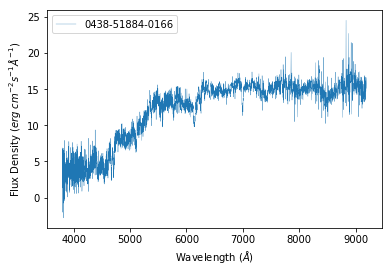

In [2]:
spec = from_fits(file='spec-0438-51884-0166.fits',ns='0438-51884-0166')
spec.plot_i()

#### Spectrum.bin() bins the spectrum so that delta lambda is 1 when shifted to rest 

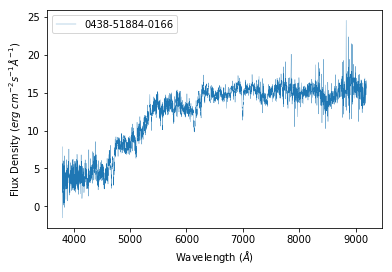

In [3]:
spec.bin(inplace=True)
spec.plot_i()

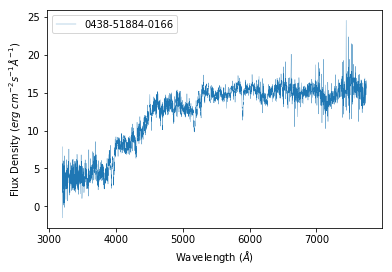

In [4]:
spec.shiftToRest(inplace=True)
spec.plot_i()

#### Spectrum.residual() uses a callable to find background and background subtracted spectrum. 

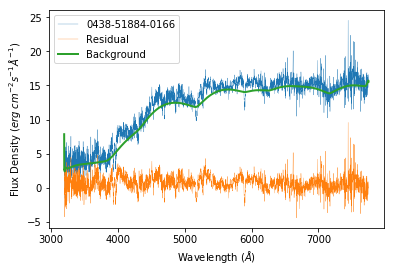

In [5]:
res, bck = spec.residual(snip, niter=50,smoothWindow=15)
spec.plot_i()
res.plot_i()
bck.plot_i(lw=2)

####  Load a second spectrum

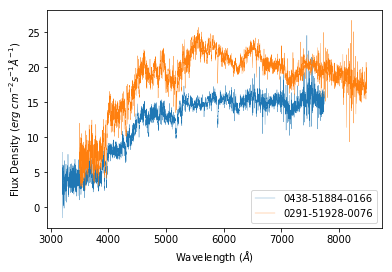

In [6]:
spec2 = from_fits(file='spec-0291-51928-0076.fits',ns='0291-51928-0076')
spec2.bin(inplace=True)
spec2.shiftToRest(inplace=True)
spec.plot_i()
spec2.plot_i()

####  Scaling the spectra around 4000 A

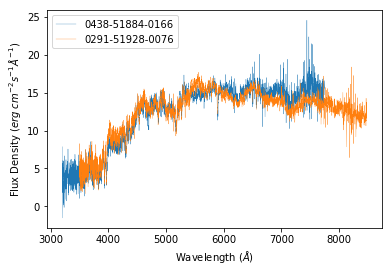

In [7]:
spec2.scale(scale_spec=spec,scaleWL=5000,radius=10)
spec.plot_i()
spec2.plot_i()

#### Make average spectrum

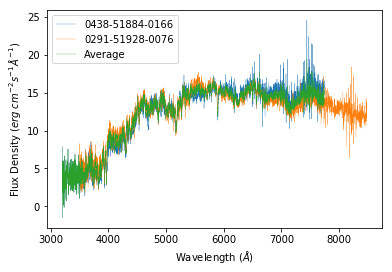

In [8]:
av_spec = average([spec,spec2],ns='Average',full_range=False)
spec.plot_i()
spec2.plot_i()
av_spec.plot_i()

#### Chi analysis

In [9]:
spec.chi(main=av_spec,scaled=False)

409.67742799561711